In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [ ]:
df = pd.read_csv("1B.tsv", sep = '\t')

In [ ]:
df.head()

,Gender,Birth Date,Height,Weight,family_history_with_overweight,High Calorie Meal Freq,Veggies in Meals freq,Daily Main Meals,Snack Frequency,Smoking,Daily Water Consumption,Weekly Physical Activity,Alcohol,Transportation,Obesity level
0,Female,2003/02/05,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,0.0,no,Public_Transportation,Normal_Weight
1,Female,2003/06/13,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,3.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,2001/06/25,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,2.0,Frequently,Public_Transportation,Normal_Weight
3,Male,1997/08/14,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,2.0,Frequently,Walking,Overweight_Level_I
4,Male,2002/05/14,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 15)

In [ ]:
df.columns

Index(['Gender', 'Birth Date', 'Height', 'Weight',
       'family_history_with_overweight', 'High Calorie Meal Freq',
       'Veggies in Meals freq', 'Daily Main Meals', 'Snack Frequency',
       'Smoking', 'Daily Water Consumption', 'Weekly Physical Activity',
       'Alcohol', 'Transportation', 'Obesity level'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Birth Date                      2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   object 
 4   family_history_with_overweight  2111 non-null   object 
 5   High Calorie Meal Freq          2111 non-null   object 
 6   Veggies in Meals freq           2111 non-null   float64
 7   Daily Main Meals                2111 non-null   float64
 8   Snack Frequency                 2101 non-null   object 
 9   Smoking                         2111 non-null   object 
 10  Daily Water Consumption         2111 non-null   float64
 11  Weekly Physical Activity        2111 non-null   float64
 12  Alcohol                         21

In [ ]:
df['Obesity level'].value_counts()

,count
Obesity level,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [ ]:
a = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']

df['Obesity level'] = df['Obesity level'].astype(str)


encode1 = OrdinalEncoder(categories=[a], handle_unknown='use_encoded_value', unknown_value=-1)

df['Obesity level'] = encode1.fit_transform(df[['Obesity level']])

In [ ]:
input_df=df.drop('Obesity level',axis=1)
output_df=df['Obesity level']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

In [ ]:
df['Snack Frequency'].value_counts()

,count
Snack Frequency,
Sometimes,1758
Frequently,241
Always,52
no,50


In [ ]:
import statistics as st

In [ ]:
st.mode(df['Snack Frequency'])

'Sometimes'

In [ ]:
x_test['Snack Frequency'].fillna('Sometimes', inplace=True)
x_train['Snack Frequency'].fillna('Sometimes', inplace=True)



<ipython-input-14-798fba3e146f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['Snack Frequency'].fillna('Sometimes', inplace=True)
<ipython-input-14-798fba3e146f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,1068
Female,1043


In [ ]:
df['Birth Date'].value_counts()

,count
Birth Date,
2003/03/06,4
2004/08/29,4
2001/02/09,4
2006/08/02,4
1998/04/29,4
...,...
1994/08/07,1
2003/07/14,1
2005/04/30,1


In [ ]:
x_train['Birth Date'] = pd.to_datetime(df['Birth Date'])
x_test['Birth Date'] = pd.to_datetime(df['Birth Date'])

In [ ]:
df['Height'].value_counts()

,count
Height,
1.700000,60
1.650000,50
1.600000,43
1.750000,39
1.620000,36
...,...
1.842943,1
1.706082,1
1.704141,1


In [ ]:
df['Weight'].value_counts()

,count
Weight,
delapan puluh,59
70.0,43
50.0,42
75.0,40
60.0,37
...,...
65.140408,1
87.27989,1
67.083121,1


In [ ]:
x_test['Weight'].replace('delapan puluh',"80", inplace=True)
x_train['Weight'].replace('delapan puluh',"80", inplace=True)

<ipython-input-20-cbc28553ac67>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['Weight'].replace('delapan puluh',"80", inplace=True)
<ipython-input-20-cbc28553ac67>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [ ]:
x_test['Weight'] = x_test['Weight'].astype(str).astype(float)
x_train['Weight'] = x_train['Weight'].astype(str).astype(float)

In [ ]:
df['family_history_with_overweight'].value_counts()

,count
family_history_with_overweight,
yes,1726
no,385


In [ ]:
df['High Calorie Meal Freq'].value_counts()

,count
High Calorie Meal Freq,
yes,1866
no,245


In [ ]:
df['Veggies in Meals freq'].value_counts()

,count
Veggies in Meals freq,
3.000000,652
2.000000,600
1.000000,33
2.823179,2
2.214980,2
...,...
2.927409,1
2.706134,1
2.010684,1


In [ ]:
df['Daily Main Meals'].value_counts()

,count
Daily Main Meals,
3.000000,1203
1.000000,199
4.000000,69
2.776840,2
3.985442,2
...,...
3.054899,1
3.118013,1
3.335876,1


In [ ]:
df['Smoking'].value_counts()

,count
Smoking,
no,2064
yes,44
hehe,3


In [ ]:
x_train['Smoking'].replace('hehe',"no", inplace=True)
x_test['Smoking'].replace('hehe',"no", inplace=True)

<ipython-input-28-c59ee2985e49>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['Smoking'].replace('hehe',"no", inplace=True)
<ipython-input-28-c59ee2985e49>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
df['Alcohol'].value_counts()

,count
Alcohol,
Sometimes,1401
no,639
Frequently,70
Always,1


In [ ]:
df['Transportation'].value_counts()

,count
Transportation,
Public_Transportation,1580
Automobile,457
Walking,56
Motorbike,11
Bike,7


In [ ]:
label_encoding = preprocessing.LabelEncoder()

x_train['Gender'] = label_encoding.fit_transform(x_train['Gender'])
x_test['Gender'] = label_encoding.fit_transform(x_test['Gender'])

x_train['family_history_with_overweight'] = label_encoding.fit_transform(x_train['family_history_with_overweight'])
x_test['family_history_with_overweight'] = label_encoding.fit_transform(x_test['family_history_with_overweight'])

x_train['High Calorie Meal Freq'] = label_encoding.fit_transform(x_train['High Calorie Meal Freq'])
x_test['High Calorie Meal Freq'] = label_encoding.fit_transform(x_test['High Calorie Meal Freq'])

x_train['Smoking'] = label_encoding.fit_transform(x_train['Smoking'])
x_test['Smoking'] = label_encoding.fit_transform(x_test['Smoking'])

In [ ]:
df['Obesity level'].value_counts()

,count
Obesity level,
4.0,351
6.0,324
5.0,297
2.0,290
3.0,290
1.0,287
0.0,272


In [ ]:
a = ['Always', 'Frequently', 'Sometimes', 'no']

x_train['Alcohol'] = x_train['Alcohol'].astype(str)
x_test['Alcohol'] = x_test['Alcohol'].astype(str)

x_train['Snack Frequency'] = x_train['Snack Frequency'].astype(str)
x_test['Snack Frequency'] = x_test['Snack Frequency'].astype(str)

encode1 = OrdinalEncoder(categories=[a], handle_unknown='use_encoded_value', unknown_value=-1)
x_train['Alcohol'] = encode1.fit_transform(x_train[['Alcohol']])
x_test['Alcohol'] = encode1.fit_transform(x_test[['Alcohol']])

x_train['Snack Frequency'] = encode1.fit_transform(x_train[['Snack Frequency']])
x_test['Snack Frequency'] = encode1.fit_transform(x_test[['Snack Frequency']])

In [ ]:
encode2 = OneHotEncoder()
x_train_prof_enc = pd.DataFrame(encode2.fit_transform(x_train[['Transportation']]).toarray(),columns=encode2.get_feature_names_out())
x_train=x_train.reset_index()
x_train=pd.concat([x_train,x_train_prof_enc], axis=1)

x_test_prof_enc = pd.DataFrame(encode2.fit_transform(x_test[['Transportation']]).toarray(),columns=encode2.get_feature_names_out())
x_test=x_test.reset_index()
x_test=pd.concat([x_test,x_test_prof_enc], axis=1)

In [ ]:
x_test = x_test.drop('Transportation', axis = 1)
x_train = x_train.drop('Transportation', axis = 1)

In [ ]:
x_test = x_test.drop('Birth Date', axis = 1)
x_train = x_train.drop('Birth Date', axis = 1)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 423 non-null    int64  
 1   Gender                                423 non-null    int64  
 2   Height                                423 non-null    float64
 3   Weight                                423 non-null    float64
 4   family_history_with_overweight        423 non-null    int64  
 5   High Calorie Meal Freq                423 non-null    int64  
 6   Veggies in Meals freq                 423 non-null    float64
 7   Daily Main Meals                      423 non-null    float64
 8   Snack Frequency                       423 non-null    float64
 9   Smoking                               423 non-null    int64  
 10  Daily Water Consumption               423 non-null    float64
 11  Weekly Physical Act

In [ ]:
x_train = x_train.drop('index', axis = 1)
x_test = x_test.drop('index', axis = 1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'entropy',max_depth=4)
RF_class.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_predict=RF_class.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.83      0.96      0.89        56
      Normal_Weight       0.71      0.65      0.68        62
 Overweight_Level_I       0.84      0.57      0.68        56
Overweight_Level_II       0.63      0.64      0.63        50
     Obesity_Type_I       0.79      0.71      0.74        78
    Obesity_Type_II       0.72      1.00      0.84        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.79       423
          macro avg       0.79      0.79      0.78       423
       weighted avg       0.79      0.79      0.78       423



In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8],
}

In [ ]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,
                            scoring='accuracy',
                            cv=5)

In [ ]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}
Accuracy : 0.9318683827015258


In [ ]:
RF_class_best = RandomForestClassifier(criterion= 'log_loss',max_depth=8)

In [ ]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(criterion='log_loss', max_depth=8)

In [ ]:
y_predict_best=RF_class_best.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_best, target_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.87      0.89      0.88        62
 Overweight_Level_I       0.85      0.80      0.83        56
Overweight_Level_II       0.88      0.92      0.90        50
     Obesity_Type_I       0.96      0.97      0.97        78
    Obesity_Type_II       0.98      0.98      0.98        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.94       423
          macro avg       0.93      0.93      0.93       423
       weighted avg       0.94      0.94      0.94       423



In [ ]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

XGB_class = XGBClassifier(objective = 'multi:softprob', learning_rate = 0.01, max_depth = 4)
XGB_class.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_predict=XGB_class.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.96      0.93        56
      Normal_Weight       0.82      0.76      0.79        62
 Overweight_Level_I       0.76      0.75      0.76        56
Overweight_Level_II       0.80      0.78      0.79        50
     Obesity_Type_I       0.90      0.90      0.90        78
    Obesity_Type_II       0.95      1.00      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.88       423
          macro avg       0.88      0.88      0.88       423
       weighted avg       0.88      0.88      0.88       423



In [ ]:
parameters_xgboost = {
    'objective': ['binary:logistic', 'multi:softmax', 'multi:softprob'],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]

}

In [ ]:
XGB_class2 = XGBClassifier()
XGB_class2 = GridSearchCV(XGB_class2 ,
                          scoring='accuracy',
                          param_grid = parameters_xgboost,
                          verbose=3,
                          cv=5)

In [ ]:
XGB_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", XGB_class2.best_params_)
print("Accuracy :",XGB_class2.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.01, max_depth=2, objective=binary:logistic;, score=0.657 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=2, objective=binary:logistic;, score=0.689 total time=   0.4s
[CV 3/5] END learning_rate=0.01, max_depth=2, objective=binary:logistic;, score=0.672 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=2, objective=binary:logistic;, score=0.659 total time=   0.9s
[CV 5/5] END learning_rate=0.01, max_depth=2, objective=binary:logistic;, score=0.700 total time=   1.3s
[CV 1/5] END learning_rate=0.01, max_depth=2, objective=multi:softmax;, score=0.657 total time=   0.2s
[CV 2/5] END learning_rate=0.01, max_depth=2, objective=multi:softmax;, score=0.689 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=2, objective=multi:softmax;, score=0.672 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=2, objective=multi:softmax;, score=0.659 total time=   0.2s
[

In [ ]:
XGB_class_best = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.2, max_depth = 6)

In [ ]:
XGB_class_best.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_predict_tuned = XGB_class_best.predict(x_test)

In [ ]:
print('\nClassification Report\n')
print(classification_report(y_test, y_predict_tuned, target_names=['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']))


Classification Report

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.97        56
      Normal_Weight       0.96      0.85      0.91        62
 Overweight_Level_I       0.88      0.95      0.91        56
Overweight_Level_II       0.98      0.98      0.98        50
     Obesity_Type_I       1.00      0.97      0.99        78
    Obesity_Type_II       0.98      1.00      0.99        58
   Obesity_Type_III       1.00      1.00      1.00        63

           accuracy                           0.96       423
          macro avg       0.96      0.97      0.96       423
       weighted avg       0.97      0.96      0.96       423



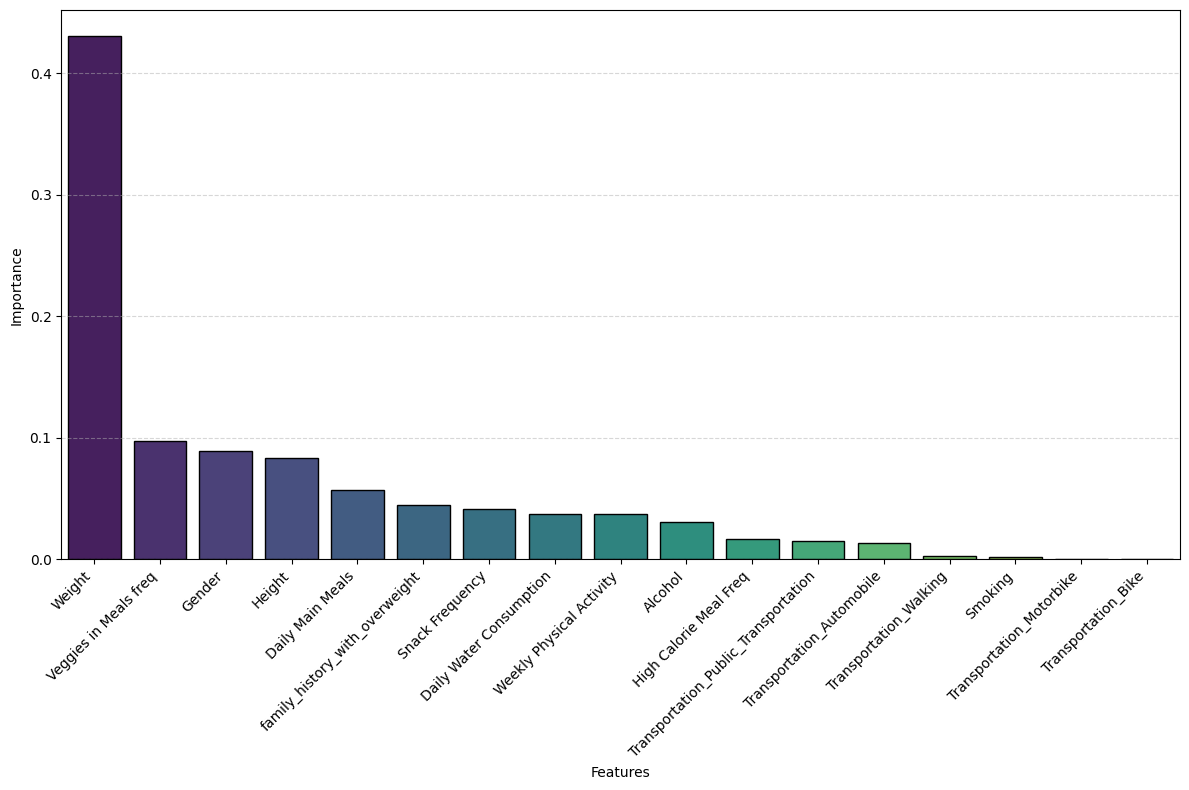

In [ ]:
feature_importances = RF_class_best.feature_importances_

features_df = pd.DataFrame({'Features': x_train.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='Importance',
            x='Features',
            data=features_df,
            palette='viridis',
            edgecolor='black'
)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

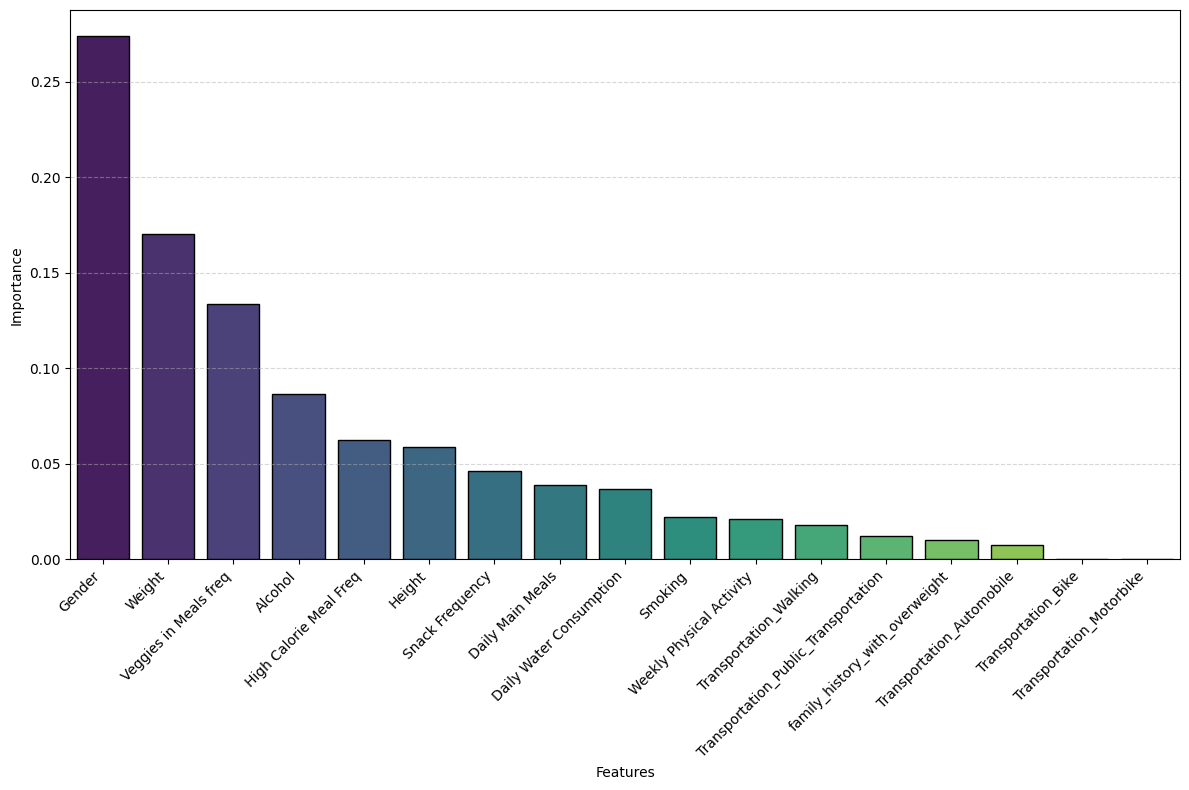

In [ ]:
feature_importances = XGB_class_best.feature_importances_

features_df = pd.DataFrame(feature_importances, index=x_train.columns, columns=["Importance"])
features_df = features_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='Importance',
            x=features_df.index,
            data=features_df,
            palette='viridis',
            edgecolor='black'
)
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()